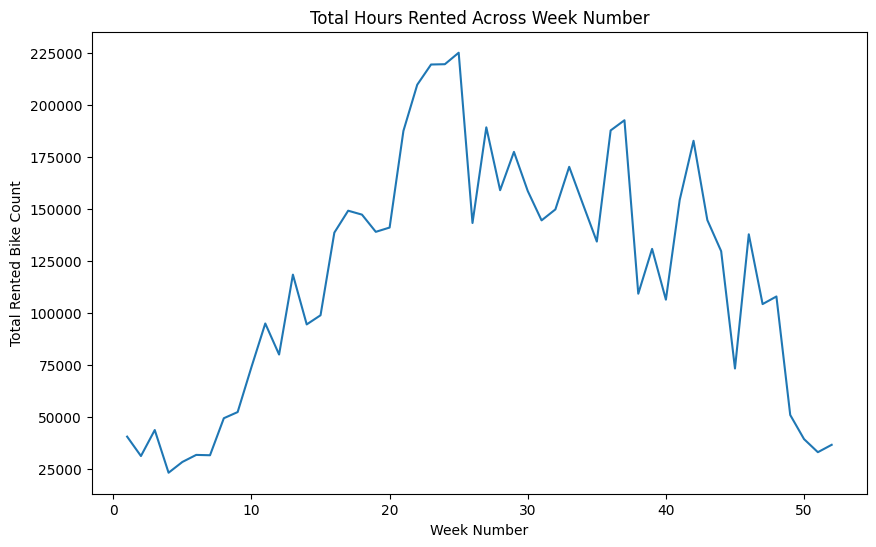

Summary of Weekly Rentals
Mean weekly bike rentals: 118698.35
Standard deviation of weekly bike rentals: 58802.05
Maximum rentals in a week: 225206.0 (Week 25)
Minimum rentals in a week: 23203.0 (Week 4)


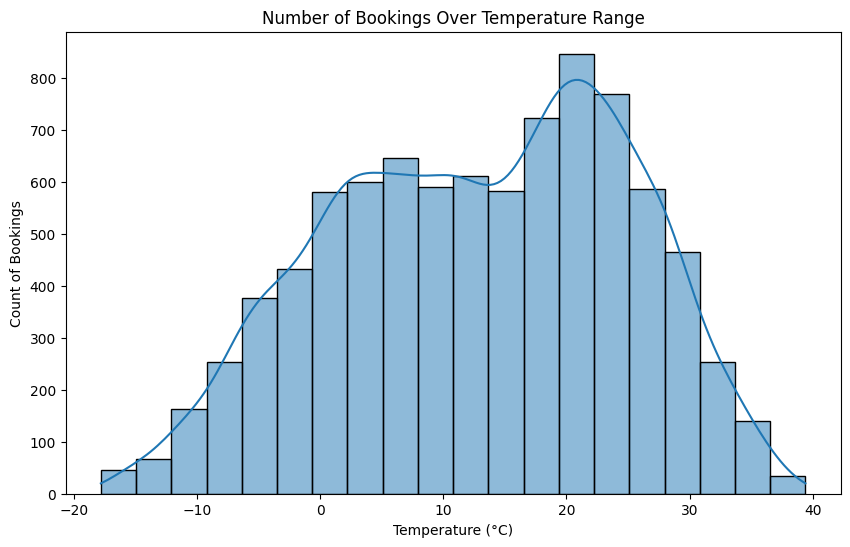

Summary of Temperature and Bookings
Mean temperature during bookings: 12.88°C
Standard deviation of temperature: 11.94°C
Minimum temperature during bookings: -17.80°C
Maximum temperature during bookings: 39.40°C


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel("C:/Users/User/OneDrive/Documents/yulu data.xlsx")
data['week_number'] = pd.to_datetime(data['Date']).dt.isocalendar().week
weekly_rentals = data.groupby('week_number')['Rented Bike Count'].sum()
plt.figure(figsize=(10, 6))
weekly_rentals.plot(kind='line', title='Total Hours Rented Across Week Number', xlabel='Week Number', ylabel='Total Rented Bike Count')
plt.show()
summary_weekly_rentals = weekly_rentals.agg(['mean', 'std', 'min', 'max'])
week_max_rentals = weekly_rentals.idxmax()
week_min_rentals = weekly_rentals.idxmin()
print("Summary of Weekly Rentals")
print(f"Mean weekly bike rentals: {summary_weekly_rentals['mean']:.2f}")
print(f"Standard deviation of weekly bike rentals: {summary_weekly_rentals['std']:.2f}")
print(f"Maximum rentals in a week: {summary_weekly_rentals['max']} (Week {week_max_rentals})")
print(f"Minimum rentals in a week: {summary_weekly_rentals['min']} (Week {week_min_rentals})")
plt.figure(figsize=(10, 6))
sns.histplot(data, x='Temperature(°C)', bins=20, kde=True)
plt.title('Number of Bookings Over Temperature Range')
plt.xlabel('Temperature (°C)')
plt.ylabel('Count of Bookings')
plt.show()
summary_temp = data['Temperature(°C)'].agg(['mean', 'std', 'min', 'max'])
print("Summary of Temperature and Bookings")
print(f"Mean temperature during bookings: {summary_temp['mean']:.2f}°C")
print(f"Standard deviation of temperature: {summary_temp['std']:.2f}°C")
print(f"Minimum temperature during bookings: {summary_temp['min']:.2f}°C")
print(f"Maximum temperature during bookings: {summary_temp['max']:.2f}°C")

In [2]:
data.fillna(method='ffill', inplace=True)
Q1 = data['Temperature(°C)'].quantile(0.25)
Q3 = data['Temperature(°C)'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Temperature(°C)'] < (Q1 - 1.5 * IQR)) | (data['Temperature(°C)'] > (Q3 + 1.5 * IQR)))]

C:\Users\User\AppData\Local\Temp\ipykernel_29056\667793840.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


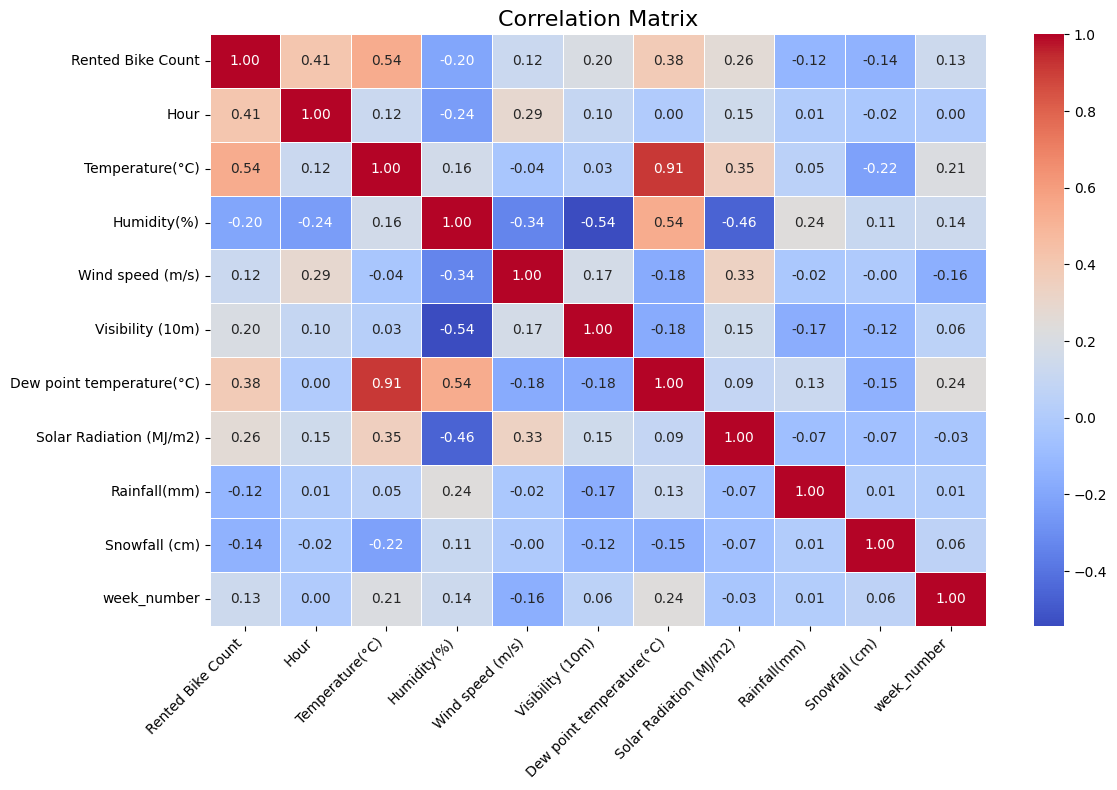

Correlation with 'Rented Bike Count
Rented Bike Count            1.000000
Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Visibility (10m)             0.199280
week_number                  0.134311
Wind speed (m/s)             0.121108
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Humidity(%)                 -0.199780
Name: Rented Bike Count, dtype: float64


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()
correlation_rented_bikes = corr_matrix['Rented Bike Count'].sort_values(ascending=False)
print("Correlation with 'Rented Bike Count")
print(correlation_rented_bikes)

In [4]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
scaler = StandardScaler()
scaled_cols = scaler.fit_transform(data[['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)']])
scaled_df = pd.DataFrame(scaled_cols, columns=['Scaled_Temperature', 'Scaled_Humidity', 'Scaled_Wind_Speed', 'Scaled_Visibility'])
data = pd.concat([data, scaled_df], axis=1)
data.drop(['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)'], axis=1, inplace=True)
print("Scaled Data (First 5 Rows):")
print(data[['Scaled_Temperature', 'Scaled_Humidity', 'Scaled_Wind_Speed', 'Scaled_Visibility']].head())

Scaled Data (First 5 Rows):
   Scaled_Temperature  Scaled_Humidity  Scaled_Wind_Speed  Scaled_Visibility
0           -1.513957        -1.042483           0.458476           0.925871
1           -1.539074        -0.993370          -0.892561           0.925871
2           -1.580936        -0.944257          -0.699556           0.925871
3           -1.597680        -0.895144          -0.796059           0.925871
4           -1.580936        -1.091596           0.554978           0.925871


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = ['Temp_bin', 'Functioning Day', 'Holiday', 'Seasons']  
for col in categorical_cols:
    if col in data.columns:
        data[col] = label_encoder.fit_transform(data[col])
X = data.drop(['Rented Bike Count', 'Date'], axis=1)
y = data['Rented Bike Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 51587.50244686073
R-squared (R2): 0.8761839234872418


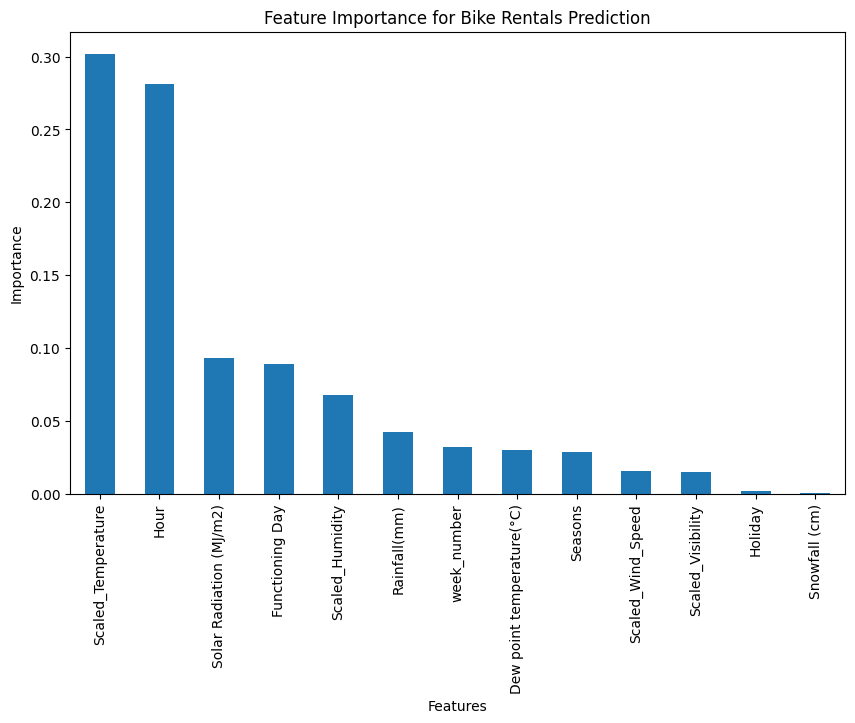

Top 5 Most Important Features:
Scaled_Temperature         0.301925
Hour                       0.281147
Solar Radiation (MJ/m2)    0.093355
Functioning Day            0.089140
Scaled_Humidity            0.067967
dtype: float64


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance for Bike Rentals Prediction')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()
print('Top 5 Most Important Features:')
print(feature_importances.head())

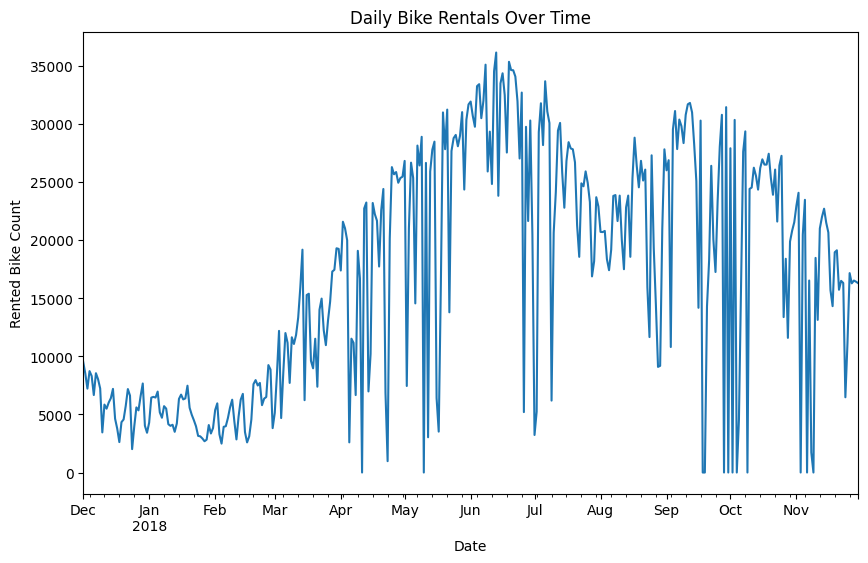

Summary of Daily Bike Rentals
Total bike rentals over the period: 6172314
Mean daily bike rentals: 16910.45
Standard deviation of daily bike rentals: 10258.64
Maximum daily bike rentals: 36149 (on 2018-06-13)
Minimum daily bike rentals: 0 (on 2018-04-11)
Observations
There appears to be a general upward or stable trend in bike rentals over time.


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
daily_data = data['Rented Bike Count'].resample('D').sum()
plt.figure(figsize=(10, 6))
daily_data.plot()
plt.title('Daily Bike Rentals Over Time')
plt.ylabel('Rented Bike Count')
plt.xlabel('Date')
plt.show()
mean_rentals = daily_data.mean()
std_rentals = daily_data.std()
min_rentals = daily_data.min()
max_rentals = daily_data.max()
total_rentals = daily_data.sum()
max_rental_date = daily_data.idxmax()
min_rental_date = daily_data.idxmin()
print("Summary of Daily Bike Rentals")
print(f"Total bike rentals over the period: {total_rentals}")
print(f"Mean daily bike rentals: {mean_rentals:.2f}")
print(f"Standard deviation of daily bike rentals: {std_rentals:.2f}")
print(f"Maximum daily bike rentals: {max_rentals} (on {max_rental_date.date()})")
print(f"Minimum daily bike rentals: {min_rentals} (on {min_rental_date.date()})")
if daily_data.index[-1] > daily_data.index[0]:
    print("Observations")
    if mean_rentals > 0:
        print("There appears to be a general upward or stable trend in bike rentals over time.")
    else:
        print("There may be fluctuations or an overall downward trend in bike rentals over time.")

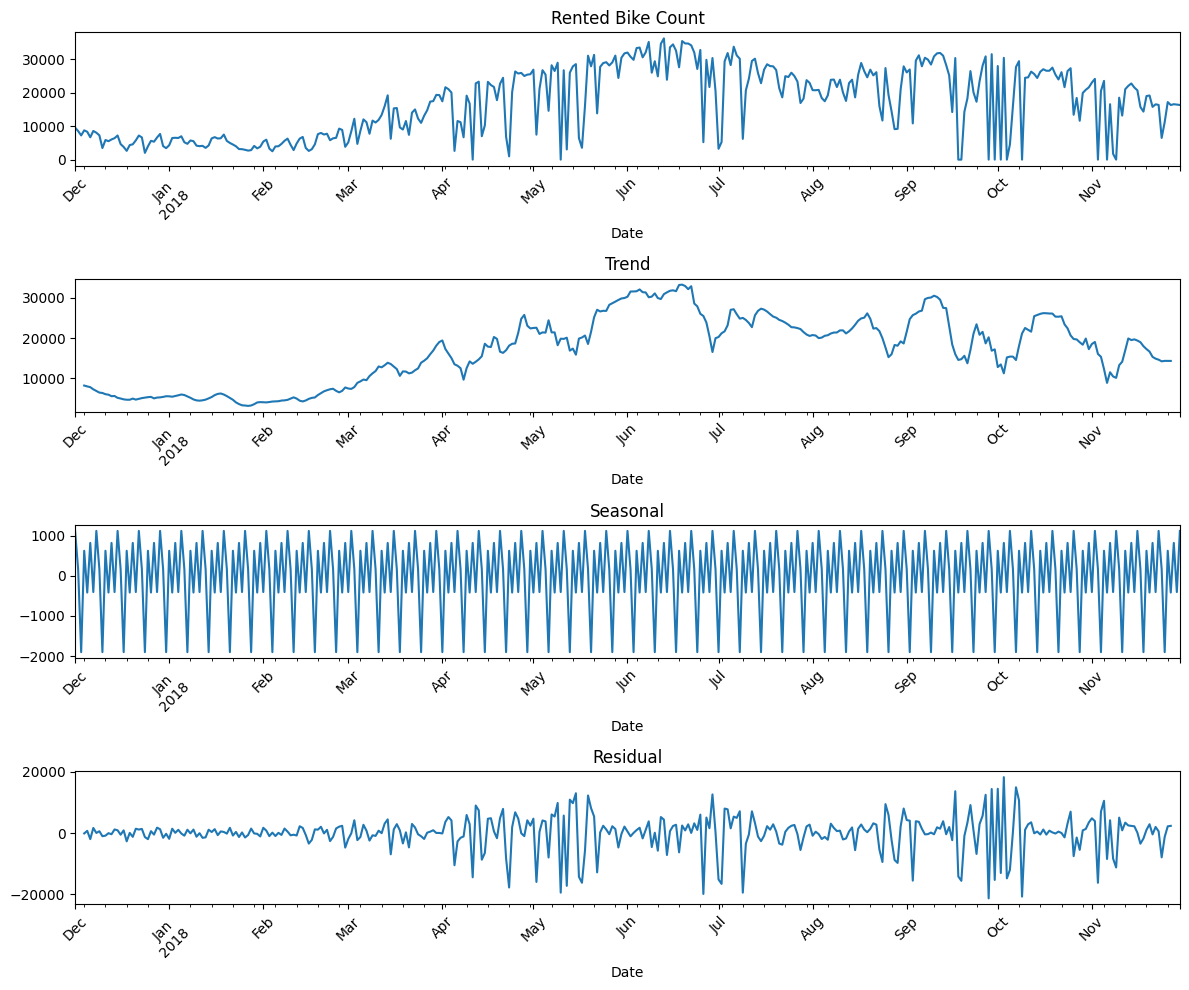

Trend Component Summary 
Mean Trend: 16986.72
Standard Deviation of Trend: 8481.22
Maximum Trend: 33296.57
Minimum Trend: 3166.71
Seasonal Component Summary 
Mean Seasonality: 3.06
Standard Deviation of Seasonality: 950.10
Maximum Seasonality: 1118.65
Minimum Seasonality: -1902.39
 Residual Component Summary
Mean Residual: -1.81
Standard Deviation of Residual: 5819.71
Maximum Residual: 18270.61
Minimum Residual: -21334.79
Summary Observations
Trend fluctuates between 3166.71 and 33296.57, indicating the overall long-term pattern.
Seasonality is quite consistent with a maximum effect of 1118.65 and a minimum effect of -1902.39, showing repetitive patterns.
Residuals have a mean of -1.81, with variability suggesting noise or non-explained variations.


In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
decomposition = seasonal_decompose(daily_data, model='additive')
fig, axes = plt.subplots(4, 1, figsize=(12, 10))
decomposition.observed.plot(ax=axes[0], title='Rented Bike Count')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
decomposition.resid.plot(ax=axes[3], title='Residual')
for ax in axes:
    ax.set_xlabel('Date')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()
print("Trend Component Summary ")
print(f"Mean Trend: {trend.mean():.2f}")
print(f"Standard Deviation of Trend: {trend.std():.2f}")
print(f"Maximum Trend: {trend.max():.2f}")
print(f"Minimum Trend: {trend.min():.2f}")
print("Seasonal Component Summary ")
print(f"Mean Seasonality: {seasonal.mean():.2f}")
print(f"Standard Deviation of Seasonality: {seasonal.std():.2f}")
print(f"Maximum Seasonality: {seasonal.max():.2f}")
print(f"Minimum Seasonality: {seasonal.min():.2f}")
print(" Residual Component Summary")
print(f"Mean Residual: {residual.mean():.2f}")
print(f"Standard Deviation of Residual: {residual.std():.2f}")
print(f"Maximum Residual: {residual.max():.2f}")
print(f"Minimum Residual: {residual.min():.2f}")
print("Summary Observations")
print(f"Trend fluctuates between {trend.min():.2f} and {trend.max():.2f}, indicating the overall long-term pattern.")
print(f"Seasonality is quite consistent with a maximum effect of {seasonal.max():.2f} and a minimum effect of {seasonal.min():.2f}, showing repetitive patterns.")
print(f"Residuals have a mean of {residual.mean():.2f}, with variability suggesting noise or non-explained variations.")

In [24]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
prophet_data = daily_data.reset_index().rename(columns={'Date': 'ds', 'Rented Bike Count': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_data)
forecast = prophet_model.predict(prophet_data[['ds']])
mse = mean_squared_error(prophet_data['y'], forecast['yhat'])
mae = mean_absolute_error(prophet_data['y'], forecast['yhat'])
rmse = np.sqrt(mse)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

21:43:07 - cmdstanpy - INFO - Chain [1] start processing
21:43:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (MSE): 50334525.93168881
Mean Absolute Error (MAE): 5466.424835216416
Root Mean Squared Error (RMSE): 7094.682933837763
